# Lets Create Some Random Graphs

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random

In [100]:
            # -*- coding: utf-8 -*-

import numpy as np

'''
Idea: generar un grafo completo. Recorrerlo usando DFS desde un nodo elegido al azar.
Para cada arista que no sea puente, tomar una muestra de una variable aleatoria y eliminar
la arista si la variable supera cierto umbral. A grandes rasgos, el procedimiento consiste
en eliminar cierto porcentaje esperado de backedges.
'''

def generarPesosUniformes(n, minimo=0, maximo=10):
    return [ np.random.randint(minimo, maximo) for i in range( int(n*(n-1) / 2)) ]

def generarPesosNormales(n, mu=5, sigma=1):
    return [ int(max(np.random.normal(mu, sigma), 0)) for i in range(int(n*(n-1) / 2)) ]



In [101]:
def generarGrafo(n, pesos, p_backedge=0.5):
    # Es necesario que los pesos se correspondan con la cantidad de aristas
    # de un grafo completo de n nodos
    assert(len(pesos) == n*(n-1) / 2)

    # Genera un grafo completo representado por una lista de aristas.
    # El nodo de menor índice aparece antes, pero los pares no son ordenados
    # (es decir, el grafo no es dirigido).
    grafoCompleto = []
    pesoActual = 0
    for i in range(1, n):
        for j in range(i+1, n+1):
            grafoCompleto.append( [i, j, pesos[pesoActual]] )
            pesoActual += 1

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafoCompleto ]

    return grafoStr

In [102]:
def generarEntradaPesosUniformes(n, minimo=0, maximo=10, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(50):
                pesos = generarPesosUniformes(k, minimo, maximo)
                grafo = generarGrafo(k, pesos)
                entrada.write(str(k) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")

    return

def generarEntradaPesosNormales(n, mu=5, sigma=1, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(50):
                pesos = generarPesosNormales(k, mu, sigma)
                grafo = generarGrafo(k, pesos)
                entrada.write(str(k) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")

    return

In [103]:
generarEntradaPesosUniformes(40, 1, 30, 0.5, "./uniforme_10nodos_1a30.in")
generarEntradaPesosNormales(40, 30, 5, 0.5, "./normal_10nodos_mu30_sigma5.in")

# Corremos el experimento

In [104]:
! cd .. && make test

./getNetWork < experimentacion/normal_10nodos_mu30_sigma5.in > experimentacion/normalOutput.out 2> experimentacion/logNormal.out
./getNetWork < experimentacion/uniforme_10nodos_1a30.in > experimentacion/uniformeOutput.out 2> experimentacion/logUniforme.out


In [105]:
dfNormal = pd.read_csv("./logNormal.out", delimiter=";")
dfUniforme = pd.read_csv("./logUniforme.out", delimiter=";")

In [106]:
dfNormal.head()
dfUniforme

,Cantidad de Nodos,Cantidad de Ejes,Tiempo generando Mst,Tiempo calculando raiz
0,5,10,0.000010,0.000010
1,5,10,0.000013,0.000008
2,5,10,0.000006,0.000007
3,5,10,0.000005,0.000006
4,5,10,0.000005,0.000005
5,5,10,0.000006,0.000006
6,5,10,0.000006,0.000007
7,5,10,0.000005,0.000006
8,5,10,0.000006,0.000006
9,5,10,0.000006,0.000006


In [107]:
dfNormal = dfNormal.groupby("Cantidad de Nodos").mean()
dfUniforme = dfUniforme.groupby("Cantidad de Nodos").mean()


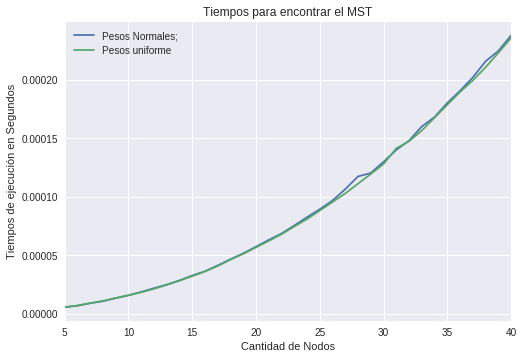

In [108]:
df4 = pd.DataFrame({'Pesos uniforme': dfUniforme['Tiempo generando Mst'],'Pesos Normales;': dfNormal['Tiempo generando Mst']})
ax = df4.plot(logy=False)
ax.set_ylabel("Tiempos de ejecución en Segundos")
plt.title("Tiempos para encontrar el MST")
plt.show()

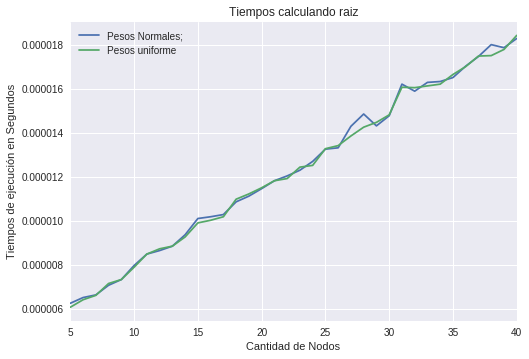

In [109]:
df4 = pd.DataFrame({'Pesos uniforme': dfUniforme['Tiempo calculando raiz'],'Pesos Normales;': dfNormal['Tiempo calculando raiz']})
ax = df4.plot(logy=False)
ax.set_ylabel("Tiempos de ejecución en Segundos")
plt.title("Tiempos calculando raiz")
plt.show()

In [115]:
dfComp = pd.DataFrame()
dfComp['Cantidad de Nodos'] = dfNormal.index.values
dfComp['Complejidad n**2'] = [100 + random.normalvariate(n**2,50) for n in dfNormal.index.values]
dfComp['Tiempo en segundos'] = dfNormal['Tiempo generando Mst']

plt.clf()
correlation = dfComp.corr()
correlation

,Cantidad de Nodos,Complejidad n**2,Tiempo en segundos
Cantidad de Nodos,1.000000,0.975040,0.976843
Complejidad n**2,0.975040,1.000000,0.995164
Tiempo en segundos,0.976843,0.995164,1.000000


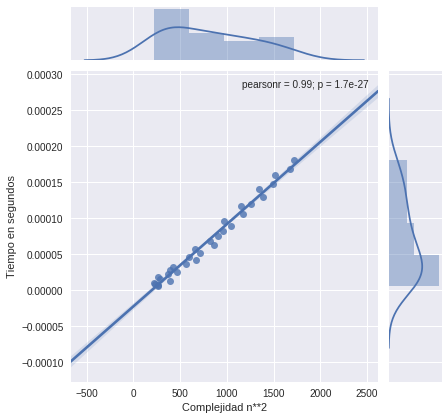

In [113]:
sns.jointplot(dfComp['Complejidad n**2'], dfComp['Tiempo en segundos'], kind="reg")
sns.plt.show()

In [124]:
dfCompRoot = pd.DataFrame()
dfCompRoot['Cantidad de Nodos'] = dfNormal.index.values
dfCompRoot['Complejidad n'] = [100 + random.normalvariate(n,1) for n in dfNormal.index.values]
dfCompRoot['Tiempo en segundos'] = dfNormal['Tiempo calculando raiz']

plt.clf()
correlation = dfCompRoot.corr()
correlation

,Cantidad de Nodos,Complejidad n,Tiempo en segundos
Cantidad de Nodos,1.000000,0.995833,0.996811
Complejidad n,0.995833,1.000000,0.992976
Tiempo en segundos,0.996811,0.992976,1.000000


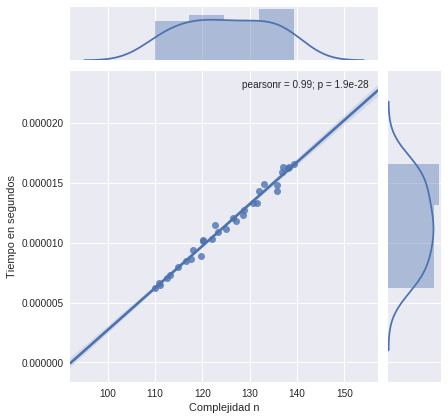

In [125]:
sns.jointplot(dfCompRoot['Complejidad n'], dfCompRoot['Tiempo en segundos'], kind="reg")
sns.plt.show()